#Introduction to a Regression model with TensorFlow

In [137]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


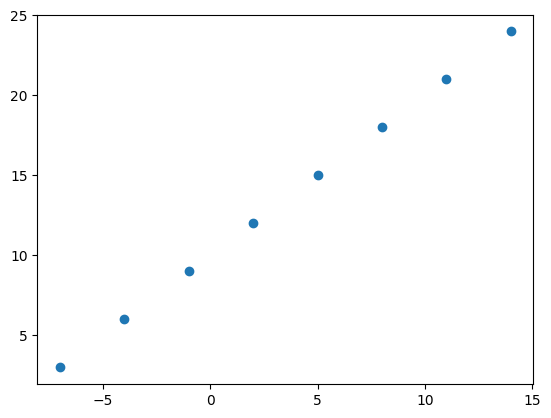

In [138]:
# Create data to view and fit
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y);

In [139]:
#This is our function
y == X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#Input and output shapes

In [140]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [141]:
input_shape = X.shape
output_shape = y
input_shape, output_shape

((8,), array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [142]:
# We will create a model that predict the y value using the X value
X[0], y[0]

(-7.0, 3.0)

In [143]:
# Turn our numpy arrays into tensors dtype float 32

X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

#Steps in modeling with TensorFlow

In [144]:
# Set random seed
tf.random.set_seed(42)

# 1.Create a model using the Sequential API
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))


# 2.Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolut error
              optimizer = tf.keras.optimizers.SGD(), # sthochastic gradient descent
              metrics=["mae"])


# 3.Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)


Epoch 1/10
1/1 [==============================] - 0s 383ms/step - loss: 11.6950 - mae: 11.6950
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 11.5389 - mae: 11.5389
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 11.3730 - mae: 11.3730
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 11.1962 - mae: 11.1962
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 11.0079 - mae: 11.0079
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 10.8071 - mae: 10.8071
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 10.5927 - mae: 10.5927
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 10.3638 - mae: 10.3638
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 10.1193 - mae: 10.1193
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 9.8578 - mae: 9.8578


In [145]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 76ms/step


array([[18.233852]], dtype=float32)

In [146]:
y_pred +  10 # mae is 10 points low

array([[28.233852]], dtype=float32)

### Improving the model


In [147]:
from os import name
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="Input_layer"),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.05),
              metrics = ["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 681ms/step - loss: 12.9153 - mae: 12.9153
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1554 - mae: 12.1554
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3935 - mae: 11.3935
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6284 - mae: 10.6284
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 9.8582 - mae: 9.8582
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0812 - mae: 9.0812
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2953 - mae: 8.2953
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4988 - mae: 7.4988
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3259 - mae: 7.3259
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8331 - mae: 7.8331
Epoch 11/100
1/1 [==============================] - 0s 8ms/step

In [148]:
model.predict([17]) # This model predict worst than the first one 

1/1 [==============================] - 0s 129ms/step


array([[29.554176]], dtype=float32)

In [149]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 1)                 2         
                                                                 
 dense_95 (Dense)            (None, 100)               200       
                                                                 
 dense_96 (Dense)            (None, 100)               10100     
                                                                 
 dense_97 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,403
Trainable params: 10,403
Non-trainable params: 0
_________________________________________________________________


# Evaluating the model

In [150]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [151]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

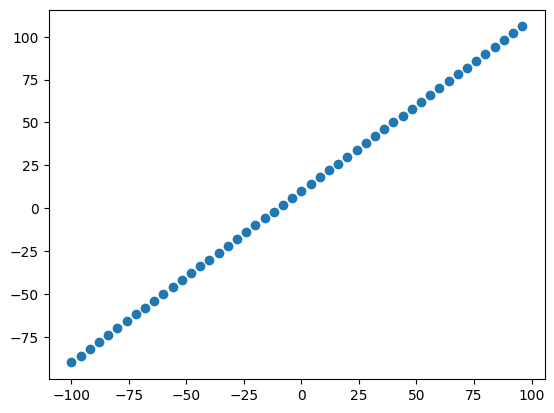

In [152]:
# Visualize the data
plt.scatter(X, y)

# Split the deta intro train test an predict sets

In [153]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

# Visualizing the data

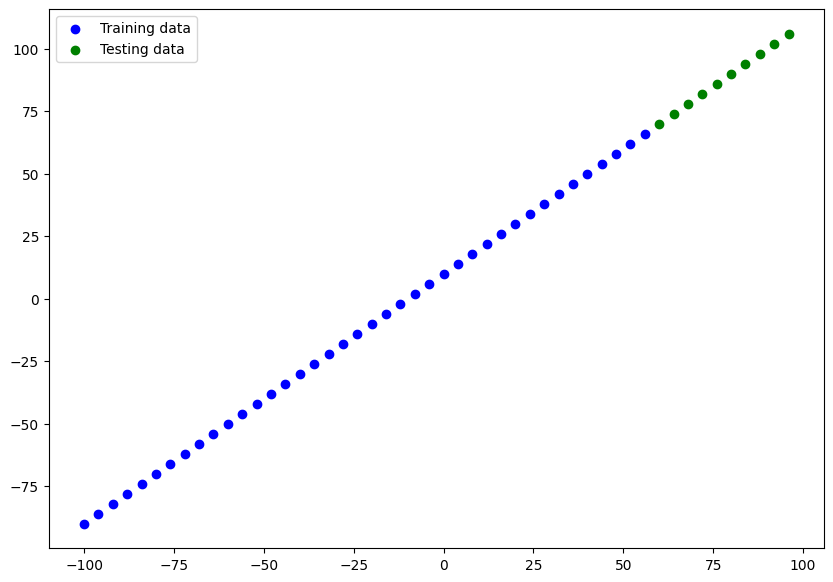

In [154]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [155]:
# Lets built the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(10, name = "dense_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")], name = "new_model")


# 2. Compile the model
model.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [156]:
from tensorflow.keras.utils import plot_model

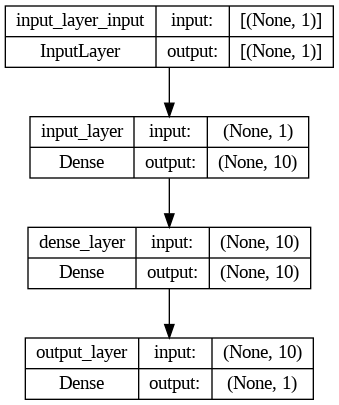

In [157]:
plot_model(model, show_shapes=True)

In [158]:

# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 52ms/step


In [159]:
model.summary()


Model: "new_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_layer (Dense)         (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


# Visualizing our model's prediction


In [160]:
# Lets create a plotting function

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

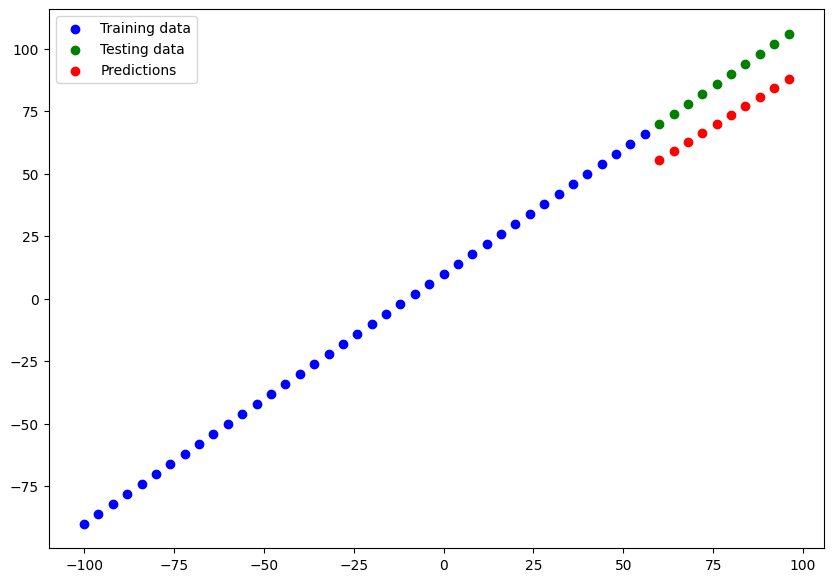

In [161]:
plot_predictions()

# Evaluating predictions with regression evaluation metrics



In [162]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 101ms/step - loss: 16.3109 - mae: 16.3109


[16.310882568359375, 16.310882568359375]

In [170]:
# Calculate model_2 metrics
mae = mae(y_test, y_preds.squeeze()).numpy()
mse = mse(y_test, y_preds.squeeze()).numpy()
mae, mse

(16.310883, 267.33905)

### Evaluating functions

In [164]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [165]:
# Creating another model to compare
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 107ms/step


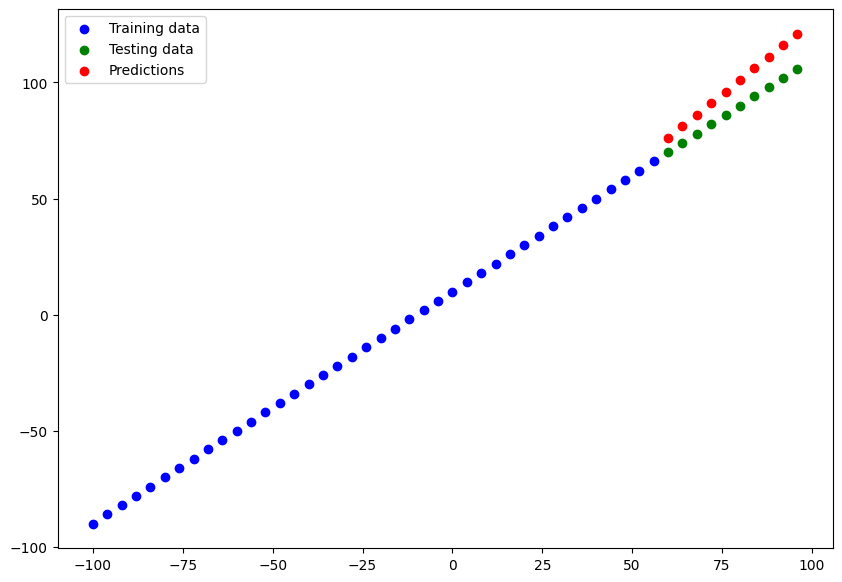

In [167]:
#Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)
     

In [168]:

# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2
     

(10.609752, 120.341064)

### Comparing models

In [171]:
model_results = [["model", mae, mse],
                 ["model_2", mae_2, mse_2]]

In [172]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model,16.310883,267.339050
1,model_2,10.609752,120.341064


# Saving Models
Save models allows us to use them outside of colab such as web aplication or mobil app.
There are two main formats.
* Svamodel format
* The HDF5 format


In [173]:
# Save model using SaveModel
model.save("first_model_save")

In [181]:
# Save model using HDF5
model.save("first_model_HDF5.h5")

# Loading model 

In [177]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("first_model_save")
loaded_saved_model.summary(), model.summary() # It is the same

Model: "new_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_layer (Dense)         (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Model: "new_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_layer (Dense)         (None, 10) 

(None, None)

In [182]:
# Load model with HDF5 format
loaded_h5_model = tf.keras.models.load_model("first_model_HDF5.h5")
loaded_h5_model.summary()

Model: "new_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_layer (Dense)         (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


# Downloading the model


In [183]:
# Download the model from google colab
from google.colab import files
files.download("first_model_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>